## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [66]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [67]:
df = pd.read_csv('ab_data.csv')
df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


b. Use the cell below to find the number of rows in the dataset.

In [68]:
data_number = df.shape[0]
print('number of rows: {}'.format(data_number))

number of rows: 294478


c. The number of unique users in the dataset.

In [69]:
unique_user = df.user_id.nunique()
print('number of unique users: {}'.format(unique_user))

number of unique users: 290584


d. The proportion of users converted.

In [70]:
converted_user = df.query('converted==1').user_id.count()
p = converted_user / unique_user
print('proportion of user converted : {}'.format(p))

proportion of user converted : 0.12126269856564711


e. The number of times the `new_page` and `treatment` don't match.

In [71]:
miss_match = df.query('(group=="treatment") & (landing_page!="new_page")').user_id.count()\
            + df.query('(group!="treatment") & (landing_page=="new_page")').user_id.count()  
print('new_page and treatment missmatches : {}'.format(miss_match))

new_page and treatment missmatches : 3893


f. Do any of the rows have missing values?

In [72]:
null_rows = df.loc[df.isnull().any(axis=1)].shape[0]
print('null rows : {}'.format(null_rows))

null rows : 0


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [73]:
#find index of missmatch treatment and new_page
miss_match1 = list(df.query('(group=="treatment") & (landing_page!="new_page")').index)
miss_match2 = list(df.query('(group!="treatment") & (landing_page=="new_page")').index)  

#append list of missmatch index, sort value in missmatch list
miss_match1.extend(miss_match2)
miss_match1.sort()

# miss_match1

In [74]:
df2 = df.drop(miss_match1) 

In [75]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [76]:
filt_unique_user = df2.user_id.nunique()
filt_unique_user

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [77]:
dup_user = df2[df2['user_id'].duplicated()]
dup_user.user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [78]:
#show duplicated user data
dup_user

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [79]:
df2.drop(dup_user.index, inplace = True)

#recheck if duplicated user is still exist
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [80]:
#count converted user in filtered dataframe
filt_conv_user = df2.query('converted==1').user_id.count()

#count probability of converted user
prob = filt_conv_user/df2.shape[0]

print('probability of converted user : {}'.format(prob))

probability of converted user : 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [81]:
#get group control dataframe
df_control = df2.query('group=="control"')

#count converted user and get probability
filt_conv_user_con = df_control.query('converted==1').user_id.count()
prob_con = filt_conv_user_con/df_control.shape[0]

print('probability of converted user control group: {}'.format(prob_con))

probability of converted user control group: 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [82]:
#get group treatment dataframe
df_treat = df2.query('group=="treatment"')

#count converted user and get probability
filt_conv_user_tre = df_treat.query('converted==1').user_id.count()
prob_tre = filt_conv_user_tre/df_treat.shape[0]

print('probability of converted user treatment group: {}'.format(prob_tre))

probability of converted user treatment group: 0.11880806551510564


d. What is the probability that an individual received the new page?

In [83]:
#new page receiver
new_rec = df2.query('landing_page=="new_page"').user_id.count()
prob_new = new_rec / df2.shape[0]

print('probability of new page receiver: {}'.format(prob_new))

probability of new page receiver: 0.5000619442226688


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

From the data above, I have an insight that probability of new page receiver is around 0.5. This indicates that numbers of viewers who get old landing page and new landing page is just the same. Counting converted viewers per group can give around the same amount of data too.

Gotten proporsion of viewers conversion regardless group variable around 0.119 from the data. Then, I separated the data into 2 dataframe based on group to get observed proporsion of converted viewers. Control group proporsion is bigger from treatment group by 0.002. Difference between them is very small, so I can not make conclution based on the data reserved. For getting more appropriate conclusion, I need to make simulation from data using bootsraping method. Bootstraping is needed in this situation, because doing many iteration means I can get more samples and make the result from samples can be more represent the population .

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

With the assumption that old page is better than new page, we can say that the alternative hypothesis is going to be or similar to pold > pnew. With that consideration, hyphothesis are shown below.

- H0 = pold - pnew <= 0
- H1 = pold - pnew > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [84]:
pnew = df2.converted.mean()
pnew

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [85]:
pold = df2.converted.mean()
pold

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [86]:
nnew = df2.query('group=="treatment"').user_id.count()
nnew

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [87]:
nold = df2.query('group=="control"').user_id.count()
nold

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [88]:
new_page_converted = np.random.choice(2, nnew, p = [1-pnew, pnew], replace=True)
mean_new = np.mean(new_page_converted)
mean_new

0.12028766086298259

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [89]:
old_page_converted = np.random.choice(2, nold, p = [1-pold, pold], replace=True)
mean_old = np.mean(old_page_converted)
mean_old

0.12185938295909798

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [90]:
mean_new - mean_old

-0.001571722096115391

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [91]:
#simulating 10000 data of pnew-pold
p_diffs = []
new_convert = np.random.binomial(nnew,pnew,10000)/nnew
old_convert = np.random.binomial(nold,pold,10000)/nold
p_diffs = new_convert - old_convert
p_diffs

array([-0.00105499,  0.00073466,  0.001684  , ..., -0.00126175,
        0.00218688, -0.00037381])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

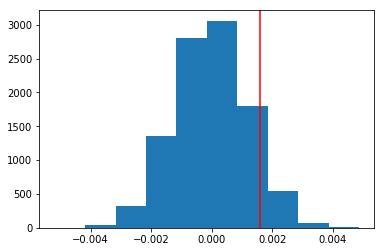

In [92]:
plt.hist(p_diffs)
plt.axvline(x=prob_con - prob_tre, color = 'red')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [93]:
#Actual difference of converted rates
actual_diff = (df2[df2['group'] == "treatment"]['converted'].mean()) - (df2[df2['group'] == "control"]['converted'].mean())
#Convert to numpy array and calculate the p-value
p_diffs = np.array(p_diffs)
(p_diffs > actual_diff).mean()

0.90049999999999997

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

in j section I calculated p value for the given hypothesis above. I tried to prove that whether or not null hypothesis is rejected. There are several steps before we can produce p value. As I have done before, the first thing that must be done is calculation differencies between pold and pnew under null hypthosis. In the null hypotesis, I assumed that pold - pnew <= 0 or I can say that pold has the same value with pnew or lower. After that, I make bootstraping to simulate data in 10000 iteration to get more data to prove hyphotesis using binomial methode. The next step is ploting the data from simulation process and observed difference of pold and pnew, also calculting pvalue under this circumstance.

If I select CI 95% or alfa 5%, we will reject the null hypothesis if pvalue is lower than alfa value. Gotten pvalue about 0.913, and with this condition I can not reject the null hyphotesis (H0). All in all, I summarize that pold - pnew <= 0 or the old page have same or lower performance than a new page.



l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [94]:

import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" and converted == 1').count()[0] 
convert_new = df2.query('landing_page == "new_page" and converted == 1').count()[0]
n_old = nold
n_new = nnew

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [95]:
from scipy.stats import norm
critical_value = norm.ppf(1-(0.05/2))
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print ("z_score = {}, p_value = {} and critical_value = {} ".format(round(z_score,2),round(p_value,2),round(critical_value,2)))

z_score = -1.31, p_value = 0.91 and critical_value = 1.96 


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

z test is one of similarity test that based on two-tailed test. In condition that z score of data is greater than 1.96 and less than -1.96, the null hyphotesis is rejected.

Based on the test result above, z score of the data is -1.31 which is greater than -1.96. From this data, I can say that we fail to reject the null Hypothesis and come with the conclusion of performance of old page is equal or lower than performance of new page. This condition is also supported with the pvalue score 0.91. Both of pvalue from part II calculation and pvalue from ztest make the same output and drive me to the same conclution, that is performance of old page is equal or greater than performance of new page in conversion viewers.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

In my oppinion, the most suitable regression for this case is logistic regression since the output are between 0 and 1 only.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [96]:
df2['intercept'] = 1

In [97]:
#make dummy variable
group = pd.get_dummies(df2['group'])
group.drop(['control'], axis = 1, inplace = True)
group.rename(columns={"treatment":"ab_page"}, inplace=True)

In [98]:
# join dummy variable to 
df2 = df2.join(group)

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [99]:
# making log reg model with intercepet and ab_page as parameters
log_reg = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
result = log_reg.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [100]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-24 05:04 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

Given P value of ab_page from summary which more than 0.05, I can say that ab_page is not statisticaly significance to converted. From the summary above, Pseudo R-squared is 0 also prove that fitness of model really low. This condition approved that ab_page is not good parameter to predict viewer will be converted or not. Adding some extra features maybe will make models having a better performance to classify conversion. 

P value in result summary is different with p value in section II. Pvalue in this section is to prove that is a feature has correlation with the label or not. In the other hand, P value in section II is used to prove that is old page performance better than new page performance. 

All in all, p value in results summary is very useful to see is parameter has correlation with the label or not

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

In my oppinion, adding some extra features can help us to predict converted from page like spending time on page, and viewers next action. Spending time on page can be a good parameter to see viewers interest on a page. By calculating mean time of converted viewer make us can predict whether or not people will convert. In the other hand, spending a lot of time maybe become indication that people abandoning the page and open the other page. This condition will be disadvantage of this feature.

The other feature is knowing next action from viewers after open the page, for example out from page or click convert button. This parameter can be important too for us to analyze does the content page is driving viewers to convert or leaving the page. By tracking this parameter we can get information which page is more interesting and potentially to make conversion or not.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [101]:
#setting up a new dataset with countries
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [102]:
#columns for dummies and dropping not needed column
df_new[['other','UK','US']] = pd.get_dummies(df_new['country'])
df_new = df_new.drop('other', axis = 1)
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


In [103]:
df_new['intercept'] = 1

In [109]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


In [110]:
# see convertion in CA country
conv_ca = df_new.query('(UK==0)&(US==0) & (converted==1)').country.count()
prob_ca = conv_ca/df_new.query('(UK==0)&(US==0)').country.count()

print('number of convertion in CA is {} with converting probabilities {}'.format(conv_ca, prob_ca))

number of convertion in CA is 1672 with converting probabilities 0.11531829781364232


In [112]:
# see convertion in UK country
conv_uk = df_new.query('(UK==1) & (converted==1)').country.count()
prob_uk = conv_ca/df_new.query('(UK==1)').country.count()

print('number of convertion in UK is {} with converting probabilities {}'.format(conv_uk, prob_uk))

number of convertion in UK is 8739 with converting probabilities 0.023072889355007866


In [114]:
# see convertion in US country
conv_us = df_new.query('(US==1) & (converted==1)').country.count()
prob_us = conv_ca/df_new.query('(US==1)').country.count()

print('number of convertion in US is {} with converting probabilities {}'.format(conv_us, prob_us))

number of convertion in US is 24342 with converting probabilities 0.008211414455429012


In [115]:
#fitting the model
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'US']])
results = log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-24 05:08 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
US             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
==================================================================

"""

In [116]:
import math

koef_uk = math.exp(results.params[1])
koef_us = math.exp(results.params[2])
koef_ca = math.exp(0)

print([koef_ca, koef_uk, koef_us])

[1.0, 1.0520274863403254, 1.0416468468924402]


From all country, the most conversion was happened in US with 24342 conversion and the least conversion was in CA. But, the proporsion of conversion for each country, US placed on the 3rd rank with only 0.008 conversion rate and CA has the biggest proportion of conversion rate with 0.115. 

Building logistic regression from data within country parameter, make us now in overall the biggest conversion parameter is Uk that has 1.05 value for each unit regardless the other parameter. The next is US which will increase 1.04 per unit increasement regardless the others variables. Seeing that coefficient make me realize that conversion in each country only has slight different. It almost gives the same amount of multiplying coefficient. Futhermore,  p_value of UK and US parameter in results summary looks statistically insignificant to predict conversion.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [119]:
df_new.drop(['UK', 'US'], axis=1, inplace=True)
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [120]:
#columns for dummies and dropping not needed column
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [121]:
### Fit Your Linear Model And Obtain the Results
sm.Logit(df_new['converted'], df_new[['intercept','US','CA']]).fit().summary2() ## We first consider us and ca

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-24 05:12 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9868    0.0114  -174.1736  0.0000  -2.0092  -1.9645
US           -0.0099    0.0133    -0.7458  0.4558  -0.0360   0.0161
CA           -0.0507    0.0284    -1.7863  0.0740  -0.1064   0.0049
==================================================================

"""

In [122]:
sm.Logit(df_new['converted'], df_new[['intercept','UK','CA']]).fit().summary2() ## now we consider uk and ca

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-24 05:12 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
UK            0.0099    0.0133     0.7458  0.4558  -0.0161   0.0360
CA           -0.0408    0.0269    -1.5178  0.1291  -0.0935   0.0119
==================================================================

"""

In [123]:
sm.Logit(df_new['converted'], df_new[['intercept','UK','US']]).fit().summary2()## now we consider uk and us

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-24 05:12 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
US             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
==================================================================

"""

based on summary from each model, coefficient of each country are not statistically significant. Next trying to multiply ab_page and countries parameter correlation.

In [125]:
df_new['page_ca'], df_new['page_uk'], df_new['page_us'] = df_new['ab_page']*df_new['CA'], df_new['ab_page']*df_new['UK'], df_new['ab_page']*df_new['US']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,page_ca,page_uk,page_us
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1,0


In [126]:
sm.Logit(df_new['converted'], df_new[['intercept','ab_page','page_ca', 'page_uk', 'page_us']]).fit().summary2() ## now we consider uk and ca

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-24 05:14 AIC:              212778.9383
No. Observations:   290584           BIC:              212821.2568
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0234       nan        nan     nan      nan      nan
page_ca      -0.0593       nan        nan     nan      nan      nan
page_uk       0.0308       nan        nan     nan      nan      nan
page_us       0.0051       nan        nan     nan      nan      nan
==================================================================

"""

In [127]:
sm.Logit(df_new['converted'], df_new[['intercept','ab_page','page_ca', 'page_uk']]).fit().summary2() ## now we consider uk and ca

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-24 05:15 AIC:              212778.9383
No. Observations:   290584           BIC:              212821.2568
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0183    0.0126    -1.4486  0.1475  -0.0430   0.0064
page_ca      -0.0644    0.0384    -1.6788  0.0932  -0.1396   0.0108
page_uk       0.0257    0.0188     1.3634  0.1728  -0.0112   0.0625
==================================================================

"""

In [129]:
sm.Logit(df_new['converted'], df_new[['intercept','ab_page','page_uk','page_us']]).fit().summary2() ## now we consider uk and ca

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-24 05:15 AIC:              212778.9383
No. Observations:   290584           BIC:              212821.2568
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0827    0.0380    -2.1763  0.0295  -0.1571  -0.0082
page_uk       0.0901    0.0405     2.2252  0.0261   0.0107   0.1694
page_us       0.0644    0.0384     1.6788  0.0932  -0.0108   0.1396
==================================================================

"""

In [130]:
sm.Logit(df_new['converted'], df_new[['intercept','ab_page','page_ca','page_us']]).fit().summary2() ## now we consider uk and ca

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-24 05:16 AIC:              212778.9383
No. Observations:   290584           BIC:              212821.2568
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page       0.0074    0.0180     0.4098  0.6819  -0.0279   0.0427
page_ca      -0.0901    0.0405    -2.2252  0.0261  -0.1694  -0.0107
page_us      -0.0257    0.0188    -1.3634  0.1728  -0.0625   0.0112
==================================================================

"""

Using all page_ca, page_uk and page_us make model cannot converge. In the next iteration used 2 combine page for making one model. The best p value is gotten from combination of page_uk and page_us with p value 0.0261 and 0.0932. The other combination give big p value result which indicates produced model is not good enough to predict conversion. With all of models, I conclude that the best model to predict converted is model with page_uk and page_us parameter on it.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [131]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0